In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import matplotlib.colors as colors
import itertools

In [2]:
def mul_gaussiab_pdf(x, mu, sigma):
    x=x.reshape(-1,1)
    mu=mu.reshape(-1,1)
    n,_=sigma.shape
    
    sigma_inv=np.linalg.inv(sigma)
    enumerator=np.exp(-(1/2)*((x-mu).T@sigma_inv@(x-mu)))
    denomenator=np.sqrt((2*np.pi)**n*np.linalg.det(sigma))
    
    return float(1./denomenator)*enumerator

In [3]:
def dec_boundary(x, mu_1, mu_2, sigma, pi_1, pi_2):
    sigma_inv=np.linalg.inv(sigma)
    return (np.log(pi_1/pi_2)-1/2*(mu_1+mu_2).T@sigma_inv@(mu_1-mu_2)+
            x.T@sigma_inv@(mu_1-mu_2)).flatten()[0]

In [4]:
def score_LDA(x,mu_c,sigma,pi_c):
    sigma_inv=np.linalg.inv(sigma)
    return (np.log(pi_c)-1/2*(mu_c).T @ sigma_inv @ (mu_c)+
           x.T@sigma_inv@(mu_c)).flatten()[0]

In [5]:
def score_QDA(x,mu_c,sigma,pi_c):
    sigma_inv = np.linalg.inv(sigma)
    return (np.log(pi_c) - 1/2 * np.log(np.linalg.det(sigma_inv)) - 1/2 * (x - mu_c).T @ sigma_inv @ (x - mu_c)).flatten()[0] 


In [6]:
def predict_class_LDA(x, mu_list, sigma, pi_list):
    scores=[]
    num_cl=len(mu_list)
    
    for i in range(num_cl):
        scores.append(score_LDA(x.reshape(-1,1),mu_list[i].reshape(-1,1),sigma,pi_list[i]))
    return np.argmax(scores)

In [7]:
def predict_class_QDA(x, mu_list, sigma_list, pi_list):
    scores=[]
    num_cl=len(mu_list)
    
    for i in range(num_cl):
        scores.append(score_QDA(x.reshape(-1,1),mu_list[i].reshape(-1,1),sigma_list[i],pi_list[i]))
    return np.argmax(scores)

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [9]:
pengu=sns.load_dataset("penguins")

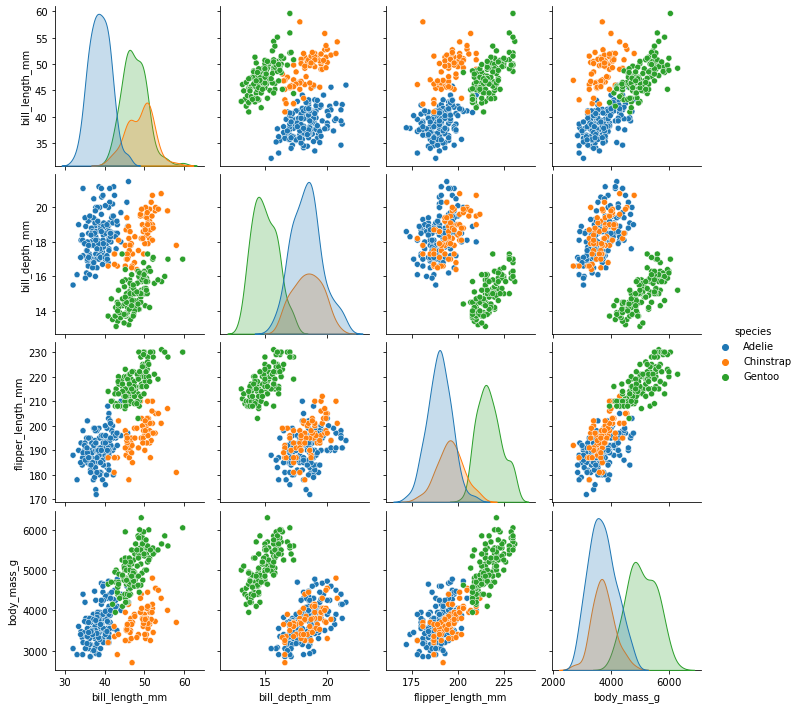

In [10]:
sns.pairplot(pengu, hue="species")

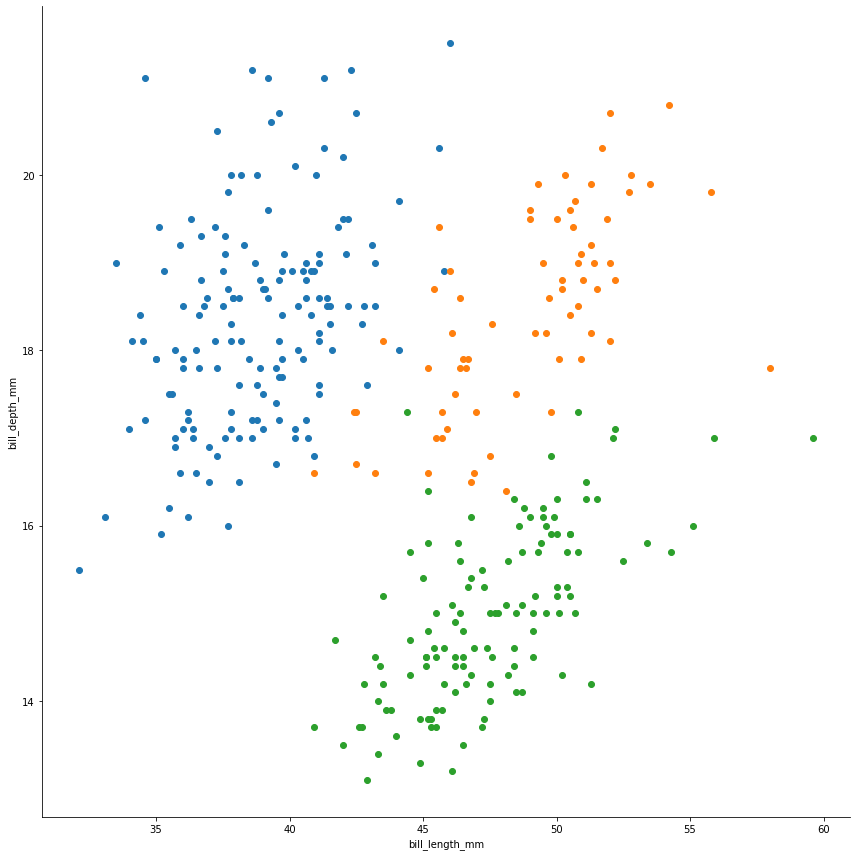

In [11]:
sns.FacetGrid(pengu, hue="species", height=12).map(plt.scatter, "bill_length_mm", "bill_depth_mm")

In [12]:
df=pengu[["bill_length_mm","bill_depth_mm","species"]]

In [13]:
df.iloc[:,2]

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [14]:
df.iloc[:,2].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [15]:
#Setting parameters
mu_list = np.split(df.groupby('species').mean().values,[1,2])
sigma_list = np.split(df.groupby('species').cov().values,[2,4], axis = 0)
pi_list = df.iloc[:,2].value_counts().values / len(df)

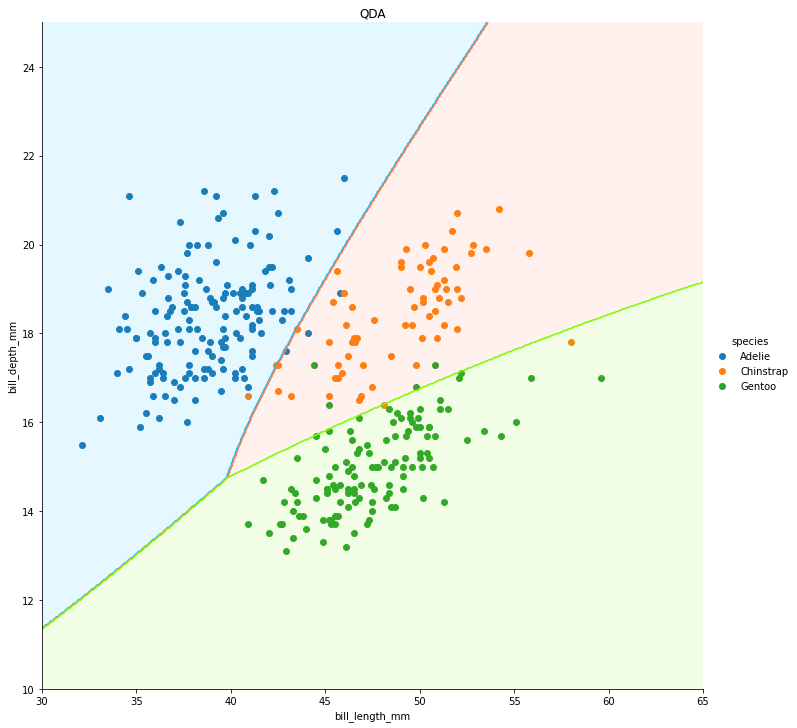

In [18]:
#space
n=500
x=np.linspace(30,65, n)
y=np.linspace(10,25, n)
x,y= np.meshgrid(x,y)

gr=sns.FacetGrid(pengu, hue="species", height=10).map(plt.scatter, "bill_length_mm", "bill_depth_mm").add_legend()
ax=gr.ax

z=np.array([
    predict_class_QDA(np.array([xx,yy]).reshape(-1,1),mu_list,sigma_list,pi_list)
    for xx,yy in zip(np.ravel(x),np.ravel(y))
])

z=z.reshape(x.shape)

ax.contourf(x,y,z, 2, alpha=0.1, colors=('deepskyblue', 'coral', 'lawngreen'))
ax.contour(x,y,z, 2, alpha=1, colors=('deepskyblue', 'coral', 'lawngreen'))
ax.set_title('QDA')

plt.show()

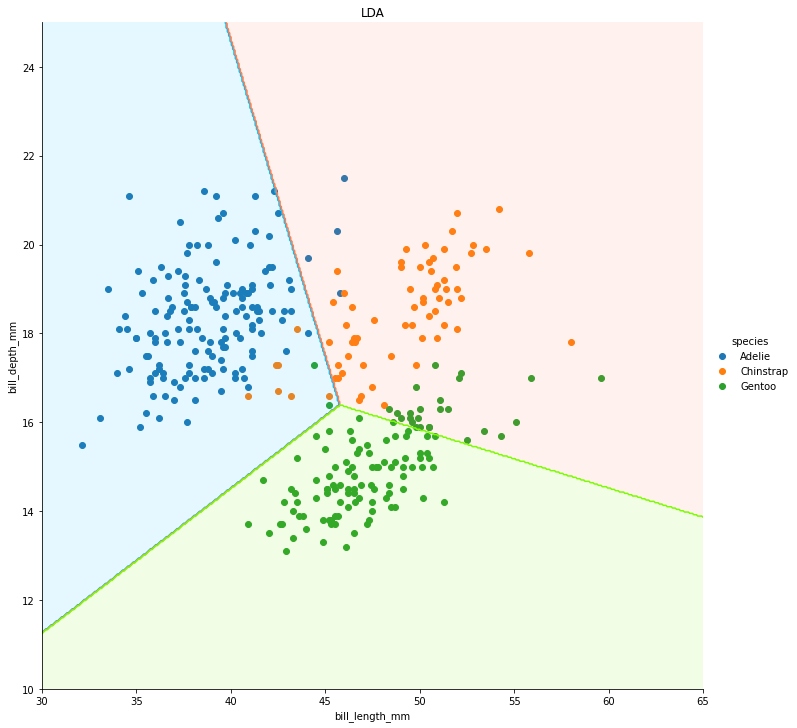

In [19]:
#space
sigma=df.cov().values

n=500
x=np.linspace(30,65, n)
y=np.linspace(10,25, n)
x,y= np.meshgrid(x,y)

gr=sns.FacetGrid(pengu, hue="species", height=10).map(plt.scatter, "bill_length_mm", "bill_depth_mm").add_legend()
ax=gr.ax

z=np.array([
    predict_class_LDA(np.array([xx,yy]).reshape(-1,1),mu_list,sigma,pi_list)
    for xx,yy in zip(np.ravel(x),np.ravel(y))
])

z=z.reshape(x.shape)

ax.contourf(x,y,z, 2, alpha=0.1, colors=('deepskyblue', 'coral', 'lawngreen'))
ax.contour(x,y,z, 2, alpha=1, colors=('deepskyblue', 'coral', 'lawngreen'))
ax.set_title('LDA')
plt.show()

In [20]:
X=df.iloc[:,0:2]
y=df.iloc[:,2]

In [21]:
y=y.replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})

In [22]:
y_hat=np.array([
    predict_class_LDA(np.array([xx,yy]),mu_list,sigma,pi_list)
    for xx,yy in zip(np.ravel(X.values[:,0]),np.ravel(X.values[:,1]))
]) 

In [23]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,

In [24]:
np.mean(y_hat==y)

0.8866279069767442

In [25]:
y_hat_QDA=np.array([
    predict_class_QDA(np.array([xx,yy]),mu_list,sigma_list,pi_list)
    for xx,yy in zip(np.ravel(X.values[:,0]),np.ravel(X.values[:,1]))
]) 

In [26]:
np.mean(y_hat_QDA==y)

0.9651162790697675